# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import os
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import requests
import time
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy library to determine the cities based on latitude and longitude
#https://datatofish.com/how-to-install-python-package-in-anaconda/
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # used activity 6.2.4 04-Stu_BurundiWeatherApp
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # used activity 6.2.4 04-Stu_BurundiWeatherApp
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ulladulla
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | ust-tsilma
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | khovd
Processing Record 8 of Set 1 | santa rosalia
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | boca do acre
Processing Record 19 of Set 1 | fort st. john
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | vadso
Processing Record 2

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [83]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.05,72,56,5.13,PN,2023-06-04 18:03:09
1,ulladulla,-35.3500,150.4667,12.09,72,100,1.95,AU,2023-06-04 18:03:24
2,constantia,44.1833,28.6500,15.39,56,71,4.61,RO,2023-06-04 18:03:39
3,udachny,66.4167,112.4000,1.36,92,100,7.35,RU,2023-06-04 18:03:30
4,ust-tsilma,65.4410,52.1498,9.68,85,100,4.54,RU,2023-06-04 18:08:09


In [89]:
#Display Date in readable format - separate columns to Date and Time so it can later be used in the scatterplot title
#source ChatGPT
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'])
#Extract Date & Time from the datetime and create two separate columns
city_data_df['Time'] = pd.to_datetime(city_data_df['Date']).dt.time
city_data_df['Date'] = pd.to_datetime(city_data_df['Date']).dt.date


In [90]:
# Export the City_Data into a csv
output_path = os.path.join("..", "output_data", "cities.csv")
city_data_df.to_csv(output_path, index_label="City_ID")

In [91]:
# Read saved data
city_data_df = pd.read_csv(output_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.05,72,56,5.13,PN,2023-06-04,18:03:09
1,ulladulla,-35.3500,150.4667,12.09,72,100,1.95,AU,2023-06-04,18:03:24
2,constantia,44.1833,28.6500,15.39,56,71,4.61,RO,2023-06-04,18:03:39
3,udachny,66.4167,112.4000,1.36,92,100,7.35,RU,2023-06-04,18:03:30
4,ust-tsilma,65.4410,52.1498,9.68,85,100,4.54,RU,2023-06-04,18:08:09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

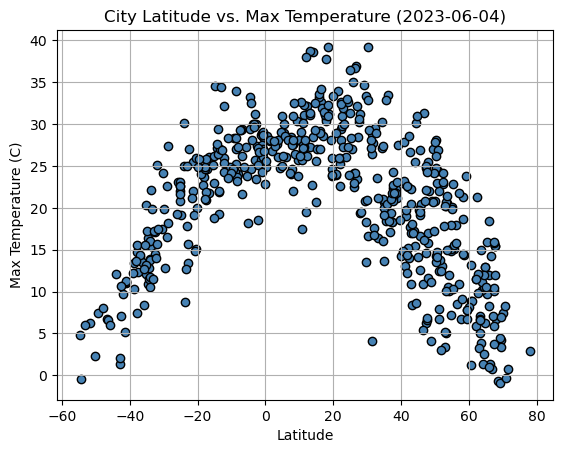

In [97]:
# Build scatter plot for latitude vs. temperature
#source: 6-2-5 Ins_OpenWeatherDataFrame
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
#define plt title with the average date of the date column in the dataframe
plt.title(f"City Latitude vs. Max Temperature ({city_data_df['Date'].min()})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig = os.path.join("..", "output_data","Fig1.png")
plt.savefig(output_fig)

# Show plot
plt.show()

#### Latitude Vs. Humidity

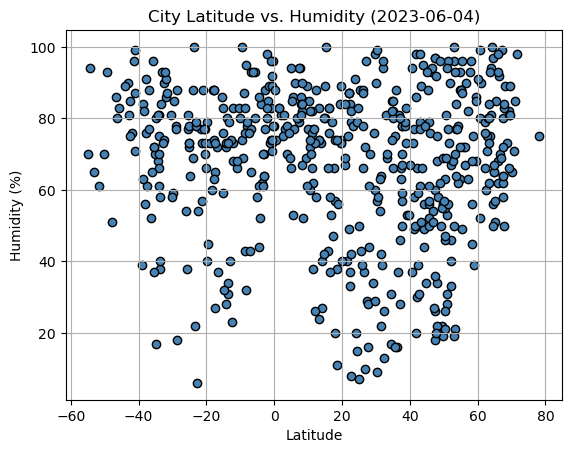

In [98]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_data_df['Date'].min()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig2 = os.path.join("..", "output_data","Fig2.png")
plt.savefig(output_fig2)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

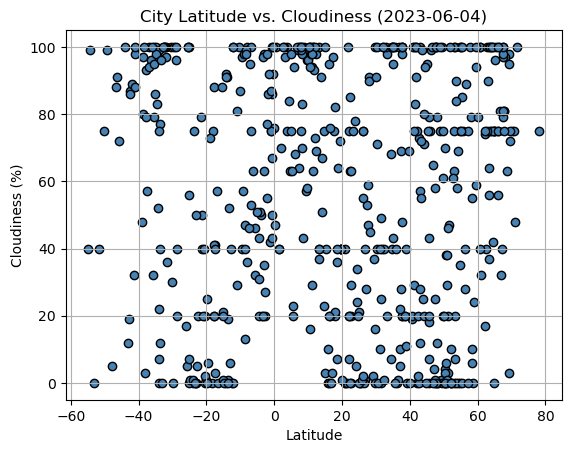

In [121]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_data_df['Date'].min()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig3 = os.path.join("..", "output_data","Fig3.png")
plt.savefig(output_fig3)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

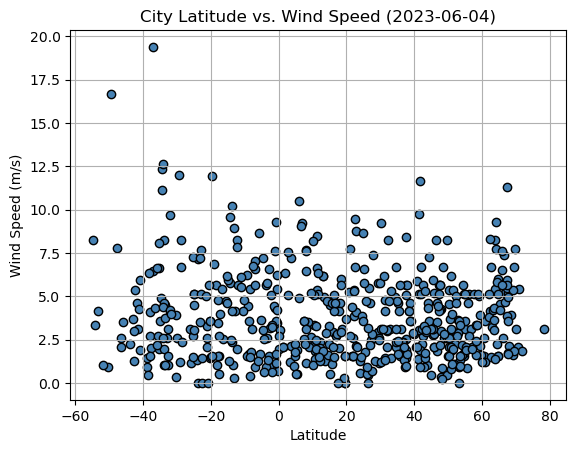

In [100]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_data_df['Date'].min()})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig4 = os.path.join("..", "output_data","Fig4.png")
plt.savefig(output_fig4)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [151]:
# Define a function to create Linear Regression plots:
#Source asked ChatGPT on how to define the function for linear regaression 
#that could be used for multiple plots 
#Tutorial on "def": https://www.programiz.com/python-programming/function#:~:text=The%20syntax%20to%20declare%20a%20function%20is%3A%20def,return%20%28optional%29%20-%20returns%20value%20from%20a%20function
#tested without parameters and it worked, but x_values & v-laues were not defined
#Couldn't figure out which arguments to define - started from x_values and y_values and added 
#additional ones from the lingress until it worked --> might've been a miracle...
def lregression(x_values, y_values, slope, intercept):
        
        # Run regression on hemisphere weather data
        # source: Class actity 6.2.7 Stu_Weather_Stats 
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        # Set y axis
        # based on the initail error after plugging in y_value in the function
        #ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
        #couldn't figure out how to pull the changing header so I opted to pull that setting 
        #from this definition

        # Label x axis
        plt.xlabel('Latitude')
        
        # Print r square value
        print(f"The r-squared is: {rvalue**2}")
        
        #Annotate the text for the line equation with the coordinates of the point chnaning the values in the tuple
        #sources: plt.annotate function explanation: 
        #https://www.binarystudy.com/2023/05/how-to-show-point-coordinates-in-plot.html#:~:text=You%20can%20call%20the%20annotate%20%28%29%20function%20on,%281%2C%204%29%2C%20xytext%3D%20%281.5%2C%204.5%29%2C%20arrowprops%3Ddict%20%28facecolor%3D%27black%27%2C%20shrink%3D0.05%29%2C
        #https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/
        #Chat GPT search on Annotate the text for the line equation with the coordinates of the point changing the values in the tuple
        #to get the location of the annotation stay constant across the regression graphs picked the min values for x and y to keep them in the bottm left corner 
        plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

        #Show plot
        plt.show()

In [129]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
City_ID,,,,,,,,,,
2,constantia,44.1833,28.6500,15.39,56,71,4.61,RO,2023-06-04,18:03:39
3,udachny,66.4167,112.4000,1.36,92,100,7.35,RU,2023-06-04,18:03:30
4,ust-tsilma,65.4410,52.1498,9.68,85,100,4.54,RU,2023-06-04,18:08:09
6,khovd,48.0056,91.6419,17.05,34,79,0.36,MN,2023-06-04,18:03:22
7,santa rosalia,27.3167,-112.2833,28.41,29,53,2.50,MX,2023-06-04,18:10:13


In [130]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Time
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.05,72,56,5.13,PN,2023-06-04,18:03:09
1,ulladulla,-35.3500,150.4667,12.09,72,100,1.95,AU,2023-06-04,18:03:24
5,lebu,-37.6167,-73.6500,12.38,61,57,2.02,CL,2023-06-04,18:03:52
8,port-aux-francais,-49.3500,70.2167,7.49,93,99,16.64,TF,2023-06-04,18:03:05
12,edinburgh of the seven seas,-37.0676,-12.3116,14.18,88,100,19.38,SH,2023-06-04,18:03:04


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5839835512509788


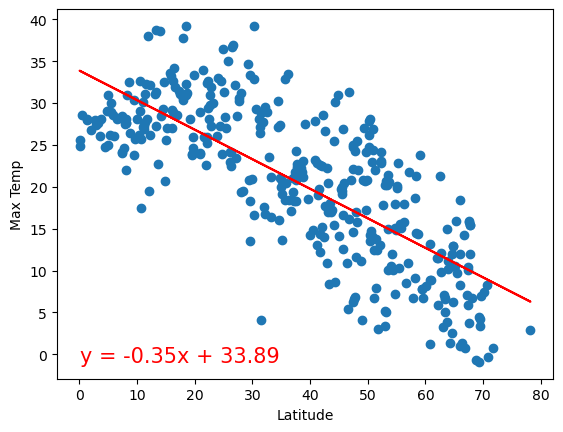

In [143]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
lregression(x_values, y_values, '', 0)

The r-squared is: 0.7307539852147124


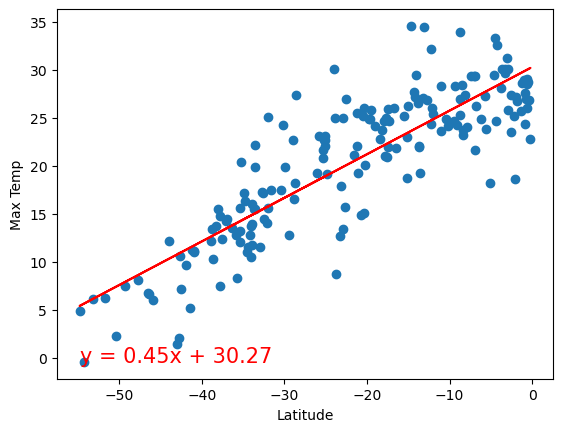

In [144]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel('Max Temp')
lregression(x_values, y_values, '', 0)


**Discussion about the linear relationship:** For the northern hemospehere there is a negative relationship bewteen the temp and latitue, while for the 
southern hemisphere the relationship is positive. However, the linear model better fits the relationship inthe southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0013424961789893382


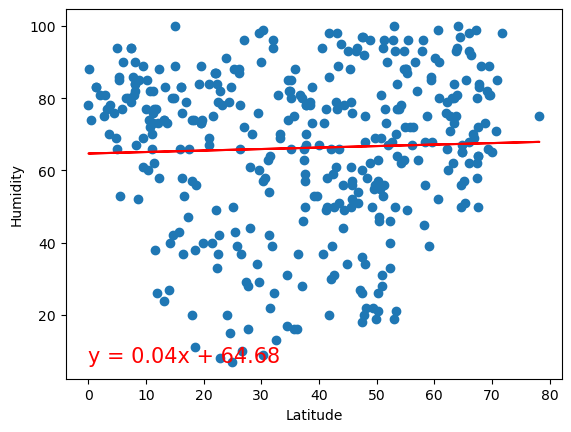

In [145]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel('Humidity')
lregression(x_values, y_values, '', 0)


The r-squared is: 8.634194495160254e-05


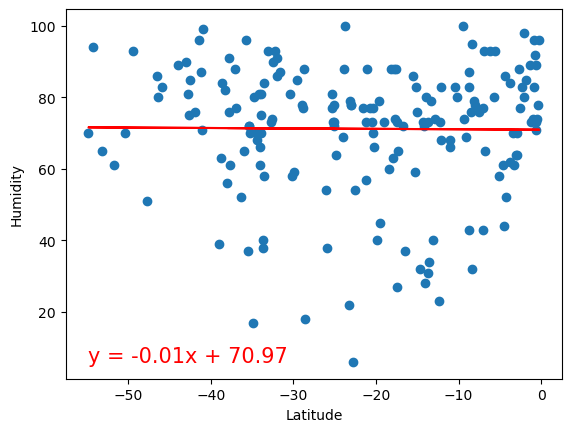

In [146]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel('Humidity')
lregression(x_values, y_values, '', 0)


**Discussion about the linear relationship:** The relationship between humifity and latitude is almost nonexistent for the northern and southwern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 4.015872859400716e-05


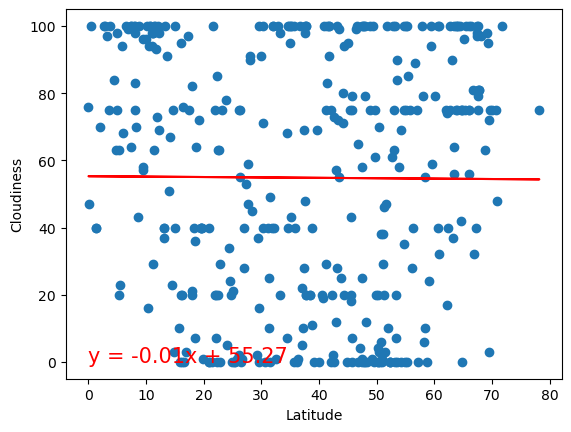

In [147]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel('Cloudiness')
lregression(x_values, y_values, '', 0)


The r-squared is: 0.009262395319453704


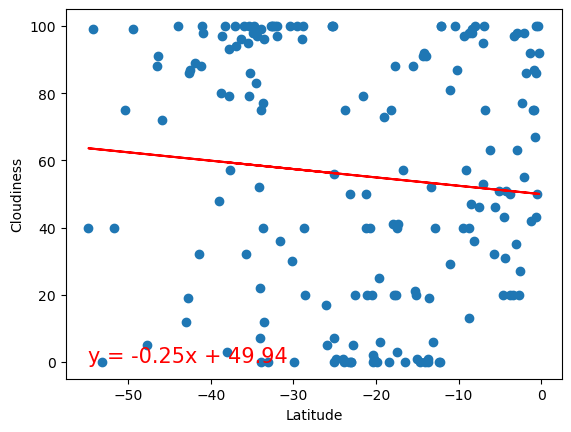

In [148]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel('Cloudiness')
lregression(x_values, y_values, '', 0)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002491522385791286


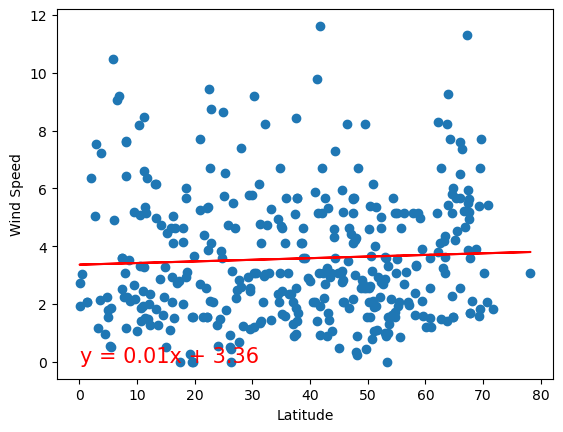

In [149]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed')
lregression(x_values, y_values, '', 0)

The r-squared is: 0.007272496685204121


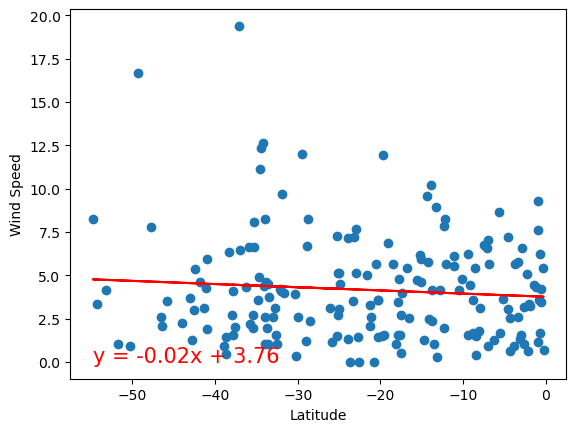

In [150]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel('Wind Speed')
lregression(x_values, y_values, '', 0)

**Discussion about the linear relationship:** YOUR RESPONSE HERE